In [3]:
from sklearn import svm, metrics
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split


In [4]:
images = []
for r,d,_ in os.walk('./mnist/train') :
    if d :
        for directory in d:
            for r2,d2,f2  in os.walk(r + '/' + directory):
                for img_name in f2 :
                    img_path = r + '/' + directory + '/' + img_name
                    images.append((img_path,directory))


In [5]:
x_data = np.array([np.asarray(Image.open(img_path).convert('L')) for img_path,_ in images])
y_data = np.array([int(label) for _, label in images])
x_data = x_data.reshape(len(x_data),28 * 28) / 255.0


In [6]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plot_param_space_heatmap(scores, C_range, gamma_range):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.jet,
               norm=MidpointNormalize(vmin=0.5, midpoint=0.9))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()


/home/snipy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 15.3min finished


Fitting 3 folds for each of 48 candidates, totalling 144 fits


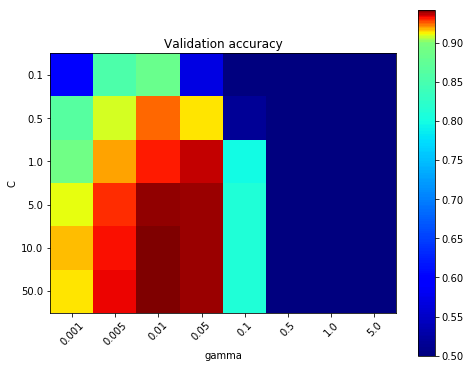

In [13]:
# GridSearch
from sklearn.model_selection import GridSearchCV

rand_idx_GS = np.random.choice(len(x_data),5000)
x_data_GS = x_data[rand_idx_GS]
y_data_GS = y_data[rand_idx_GS]

x_train, x_test, y_train, y_test = train_test_split(
    x_data_GS,
    y_data_GS,
    test_size=0.2,
    random_state=42)

C_params = np.outer(np.logspace(-1, 1, 3),np.array([1,5]))
C_params = C_params.flatten()

gamma_params = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
gamma_params = gamma_params.flatten()

grid_classifier = GridSearchCV(
    estimator = svm.SVC(),
    param_grid = {
        'kernel' : ['rbf'],
        'C' : C_params,
        'gamma' : gamma_params
    },
    n_jobs = -1,
    verbose = 2
)

grid_classifier.fit(x_train,y_train)

sorted(grid_classifier.cv_results_.keys())

classifier = grid_classifier.best_estimator_
params = grid_classifier.best_params_


scores = grid_classifier.cv_results_['mean_test_score'].reshape(
    len(C_params),
    len(gamma_params)
)

plot_param_space_heatmap(scores, C_params, gamma_params)


In [ ]:
# rand_idx= np.random.choice(len(x_data),20000)
# x_data = x_data[rand_idx]
# y_data = y_data[rand_idx]

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.2,
    random_state=42)

classifier = svm.SVC(gamma=0.01, C = 10)
classifier.fit(x_train,y_train)


Classification report for classifier SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       411
           3       1.00      0.98      0.99       397
           4       0.99      1.00      1.00       430
           5       0.99      0.99      0.99       337
           6       1.00      1.00      1.00       394
           7       1.00      0.99      0.99       423
           8       1.00      1.00      1.00       407
           9       0.99      0.99      0.99       351

   micro avg       1.00      1.00      1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00   

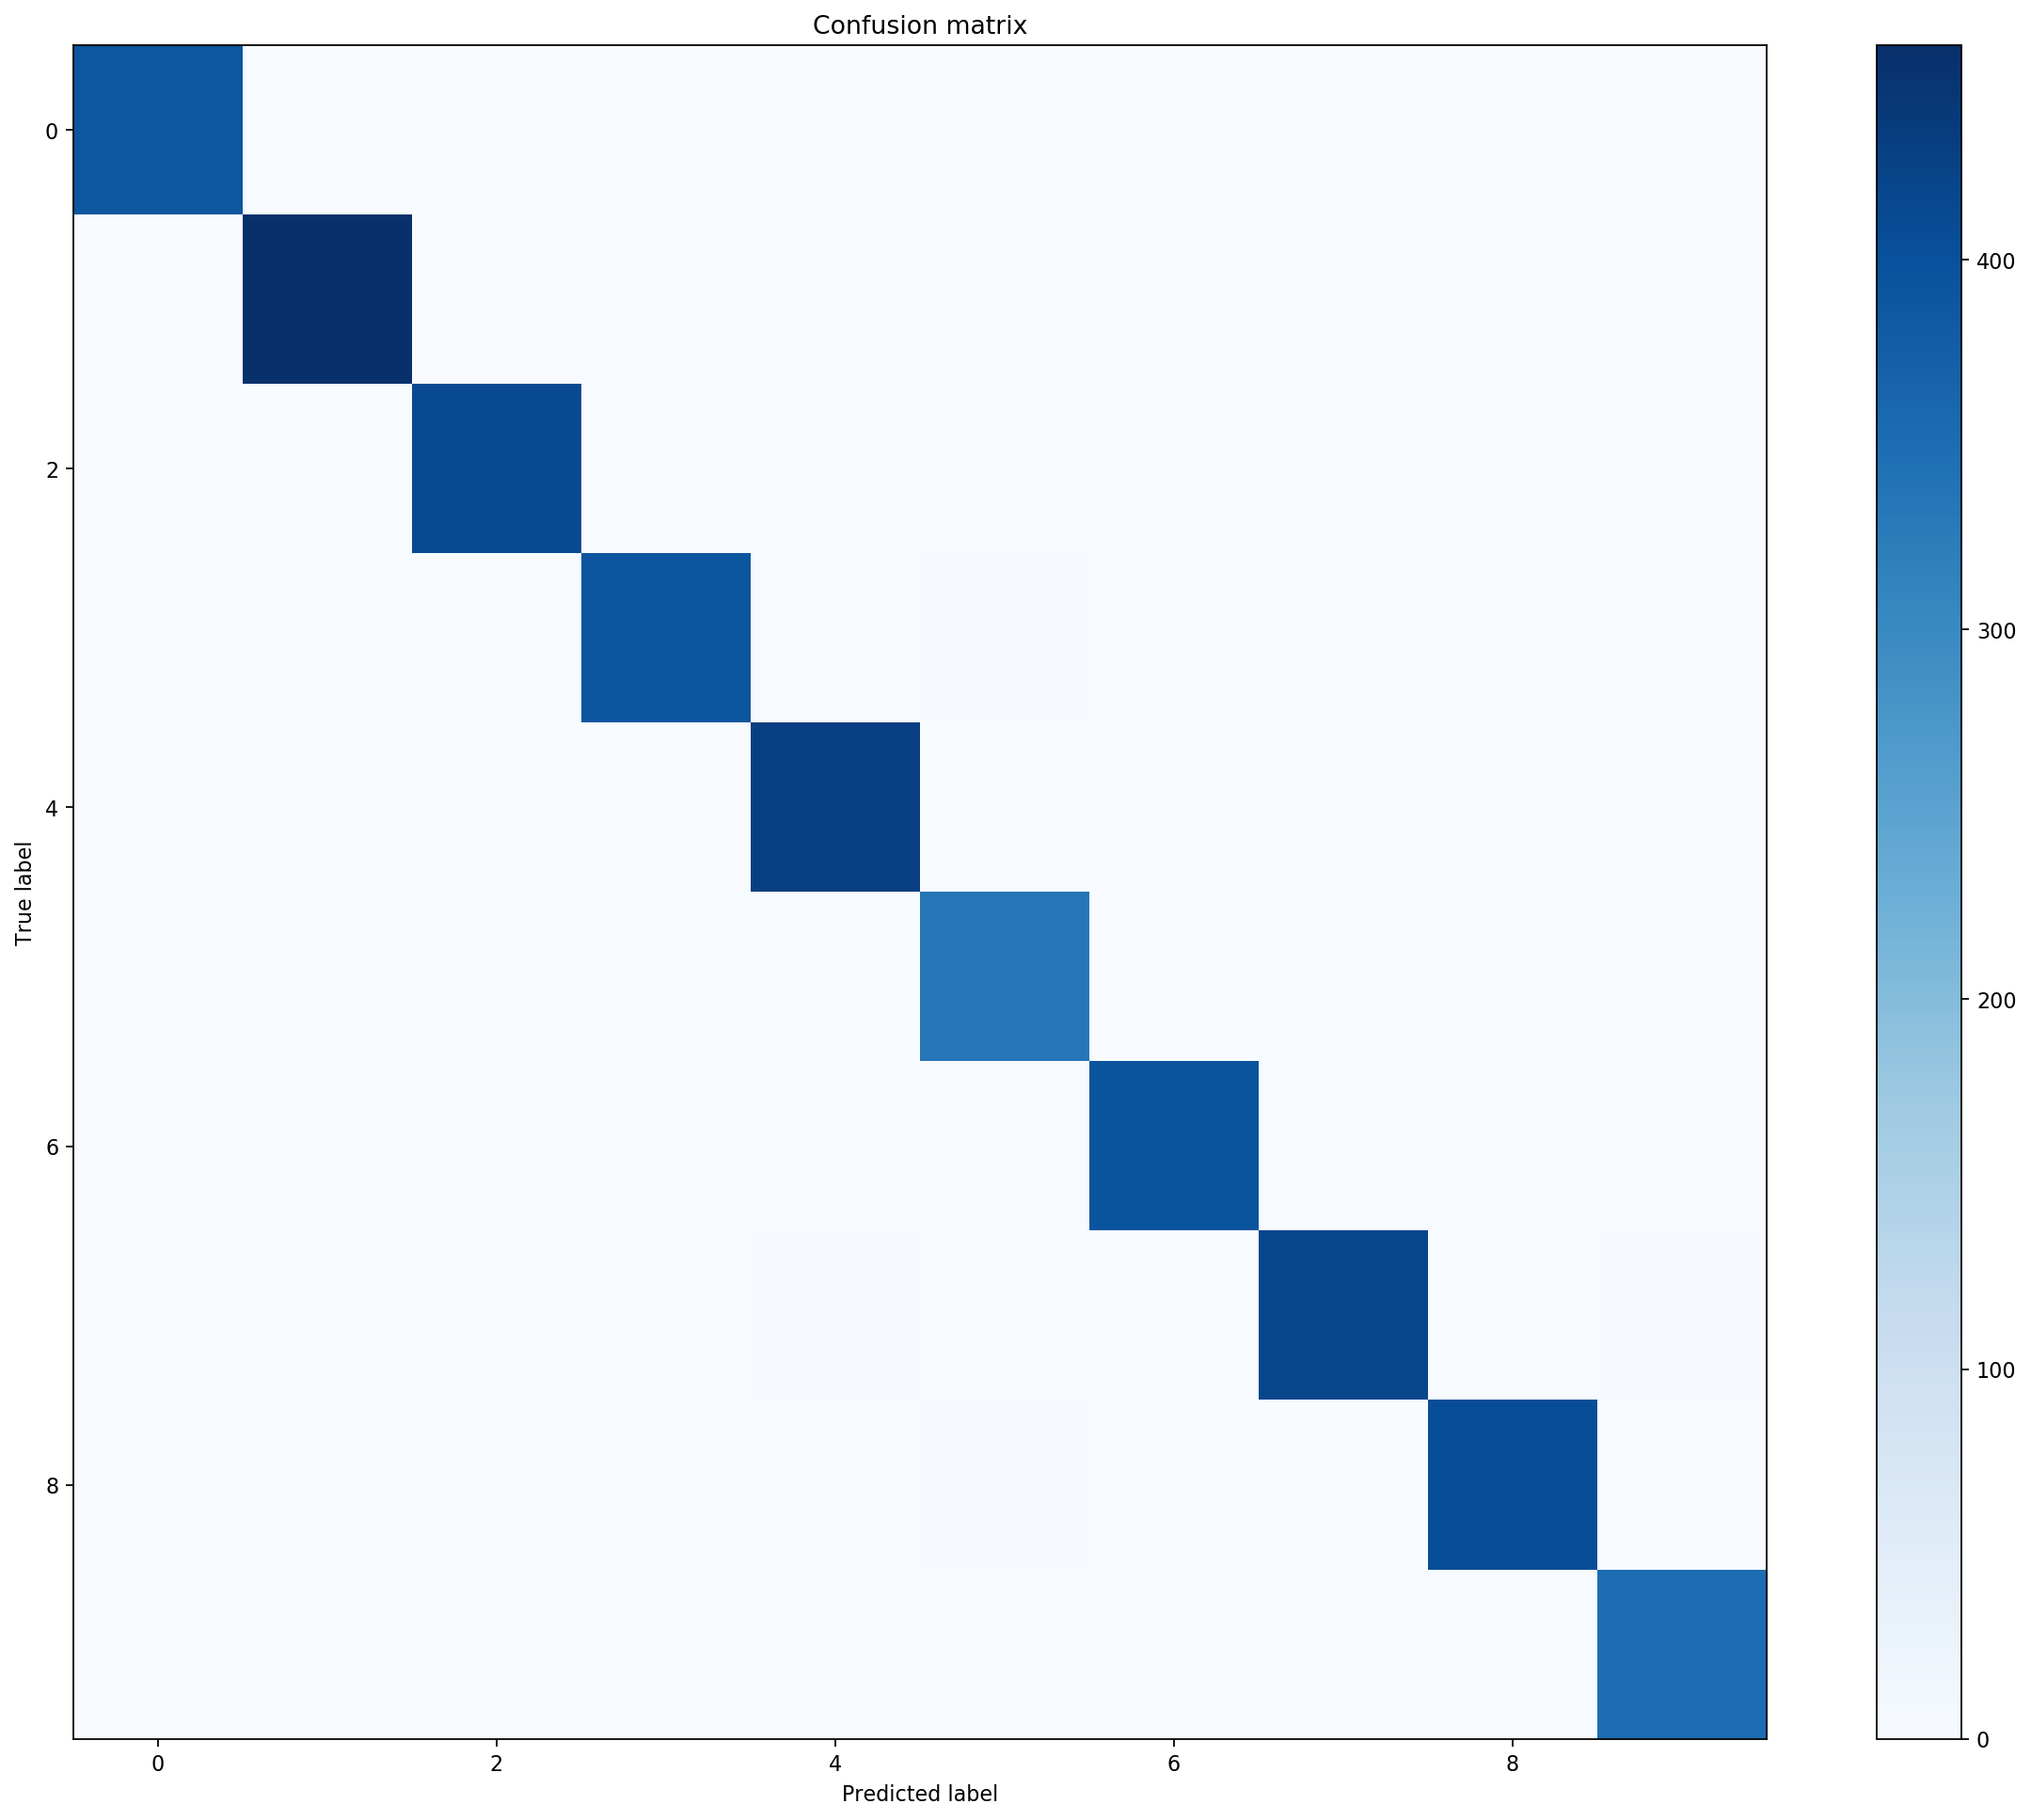

In [23]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

expected = y_test
predicted = classifier.predict(x_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))